In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
default = pd.read_csv('/home/vincent/gitrep/bookstore/datasets/Default.csv')
X = default.iloc[:, [3, 4]]
y = default.iloc[:, 1].values
y = np.where(y == 'Yes', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2016816)

X.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


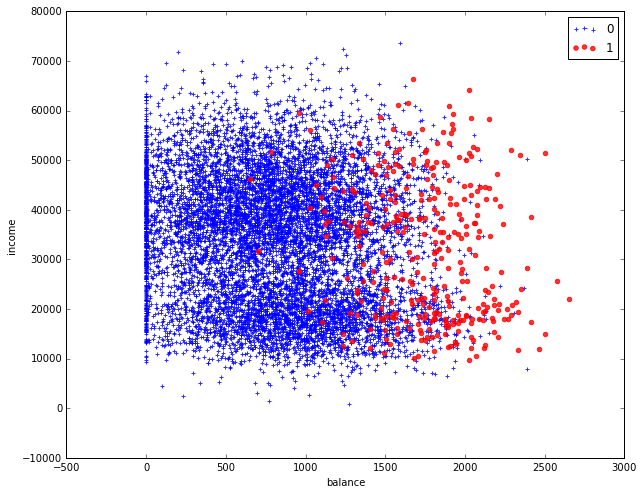

In [3]:
plt.figure(figsize=(10, 8))

colors = ('blue', 'red')
markers = ('+', 'o')
labels = np.unique(y)

for color, label, marker in zip(colors, labels, markers):
    plt.scatter(X['balance'][y == label], 
                X['income'][y == label], 
                color=color, 
                marker=marker, 
                label=label, 
                alpha=0.8)
    


plt.xlabel('balance')
plt.ylabel('income')
plt.legend(loc='upper right')

plt.show()

**从上面的散点图中，我们可以看出balance变量具有更强的预测能力**

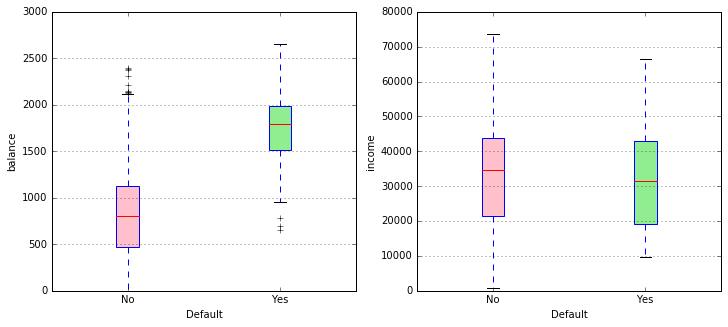

In [4]:
balance_neg = X['balance'][y == 0].values
balance_pos = X['balance'][y == 1].values
income_neg = X['income'][y == 0].values
income_pos = X['income'][y == 1].values

all_data1 = list((balance_neg, balance_pos))
all_data2 = list((income_neg, income_pos))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# boxplot的主要原理是：它要求你把category变量不同值对应的数据存入到一个列表中或array
# 其它的都是设置一些标签、颜色等等
bplot1 = axes[0].boxplot(all_data1, 
                         vert=True, # vertical box aligmnent
                         patch_artist=True) # fill with color
bplot2 = axes[1].boxplot(all_data2, 
                         vert=True, # vertical box aligmnent
                         patch_artist=True) # fill with color

# fill with colors
colors = ['pink', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax, ylabel in zip(axes, ('balance', 'income')):
    ax.yaxis.grid(True)
    ax.set_xticklabels(['No', 'Yes'])
    ax.set_xlabel('Default')
    ax.set_ylabel(ylabel)
    
plt.show()

**从上面的boxplot中，我们可以看到对于No和Yes来说，balance有着不同的分布， 而income的分布却没有分别，这同样说明balance具有更强的预测能力。**

scikit-learn中的LogisticRegression分类器总共有4个solver，它们分别是**'newton-cg', 'lbfgs', 'liblinear', 'sag'**. 它们每一个都有各自适合的场景。下面，我分别说明一下这些场景。

1. *liblinear:* 它使用的coordinate descent算法，可以使用L1 penalization，也就是可以学习sparse model. 但是它不能学习真正的multinomial model，它用的是“one-vs-rest”方法。
2. *newton-cg和lbfgs:* 它们可以学习真正的 multinomial logistic regression model，这也就是说它们的probability estimates比“one-vs-rest”方法更加准确。但是，它们不能optimize L1-penalized模型，因此它们不能学习sparse model.
3. *sag:* 它即不能学习sparse model，也不能学习真正的 multinomial logistic regression model. 但是，它对于大数据集来说，比其它的splver收敛地更快。

总结来说：

| Case | Solver |
| :-------------: |:-------------:|
| Small dataset or L1 penalty | liblinear |
| Multinomial loss | lbfgs” or newton-cg |
| Large dataset | sag |

In [12]:
lr = LogisticRegression(penalty='l2',
                        C=1000, # Inverse of regularization strength
                        random_state=2016816, # The seed to use when shuffling the data
                        solver = 'liblinear', 
                        multi_class='ovr', # “one-vs-rest”
                        n_jobs=-1, # use all CPU cores 
                    )

# 由于分类器用到了shrinkage（即 l2-penalty）方法，因此我们应该把数据集standardization
std = preprocessing.StandardScaler().fit(X)
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)

lr.fit(X_train_std, y_train)

print('training set accuracy rate：', lr.score(X_train_std, y_train))
print('testing set accuracy rate：', lr.score(X_test_std, y_test))

training set accuracy rate： 0.973857142857
testing set accuracy rate： 0.972333333333


In [109]:
for qw in range(2):
    print(qw)

0
1
